In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv, os, fnmatch, sys
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

CurrentWD = os.getcwd()
#obtain the current directory path for us so we don't have to manually find it
DataForEnergy = CurrentWD + "/Data"
DataPath = CurrentWD + "/Data/20220520"
SidePath = CurrentWD + "/Data/20220603"
SavePath = CurrentWD + "/OutFlow"
#get the path to data, I structure the folder with as /Data/<date>/<sample>


def FrameCount(Pathing):
     return len(fnmatch.filter(os.listdir(Pathing),"*.txt"))

def is_count(element):
    try:
        float(element)
        return True
    except ValueError:
        return False
   
#print(is_float(" "))


In [2]:
TestedElements = ["Ba-133","Cd-109"]
ArrayDict = {}

for t in TestedElements:
    TempDict = {}
    TempArrayDict = {}
    for i in range(FrameCount(DataPath + "/{elm}".format(elm = t))):
        TempArrayDict[i] = np.loadtxt(DataPath + "/{elm}/{elm}{val:04.0f}.txt".format(val = i,elm = t),dtype = float)
        #Count how many frames were taken and thus what we must loopthrough
        TempArrayDict[i][TempArrayDict[i] < 1] = 0 
    ArrayDict[t] = TempArrayDict

In [3]:
Testedsides = ["bottom","front","left","right"]
SideArrayDict = {}
#"Cd-109"
for t in Testedsides:
    TempDict = {}
    TempArrayDict = {}
    for i in range(FrameCount(SidePath + "/Cd-109-{side}".format(side = t))):
        TempArrayDict[i] = np.loadtxt(SidePath + "/Cd-109-{side}/Cd-109-{side}{val:03.0f}.txt".format(val = i,side = t),dtype = float)
        TempArrayDict[i][TempArrayDict[i] < 1] = 0 
    SideArrayDict[t] = TempArrayDict
        #open the txt file and strip out the new lines

TempDict = {}
TempArrayDict = {}

for i in range(FrameCount(SidePath + "/Cd-109-top")):
    TempArrayDict[i] = np.loadtxt(SidePath + "/Cd-109-top/Cd-109{val:03.0f}.txt".format(val = i),dtype = float)
    TempArrayDict[i][TempArrayDict[i] < 1] = 0 
SideArrayDict["top"] = TempArrayDict
#print(SideArrayDict)


[[0 0 0 ... 2 1 1]
 [0 3 2 ... 2 3 5]
 [2 1 1 ... 2 1 4]
 ...
 [3 2 1 ... 2 1 1]
 [1 2 4 ... 1 3 2]
 [0 1 1 ... 1 1 0]]


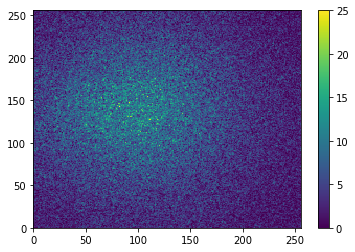

In [4]:
#print(ArrayDict["Cd-109"][1].astype(bool).astype(int))
cadmium2dhisto = np.zeros_like(ArrayDict["Ba-133"][1], dtype = int)
for i in ArrayDict["Ba-133"].values():
    cadmium2dhisto = cadmium2dhisto + i.astype(bool).astype(int)
#cadmium2dhisto[cadmium2dhisto >30]=0
print(cadmium2dhisto)
plt.pcolormesh(cadmium2dhisto)
plt.colorbar()

[[0 0 0 ... 2 0 1]
 [0 0 1 ... 1 0 3]
 [1 1 0 ... 1 2 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]]


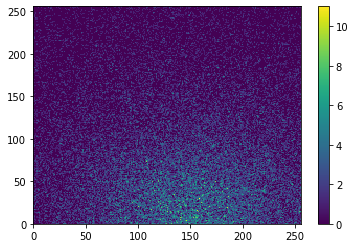

In [5]:
#print(ArrayDict["Cd-109"][1].astype(bool).astype(int))
cadmium2dhisto = np.zeros_like(ArrayDict["Cd-109"][1], dtype = int)
for i in ArrayDict["Cd-109"].values():
    cadmium2dhisto = cadmium2dhisto + i.astype(bool).astype(int)
cadmium2dhisto[cadmium2dhisto >20]=0
print(cadmium2dhisto)
plt.pcolormesh(cadmium2dhisto)
plt.colorbar()


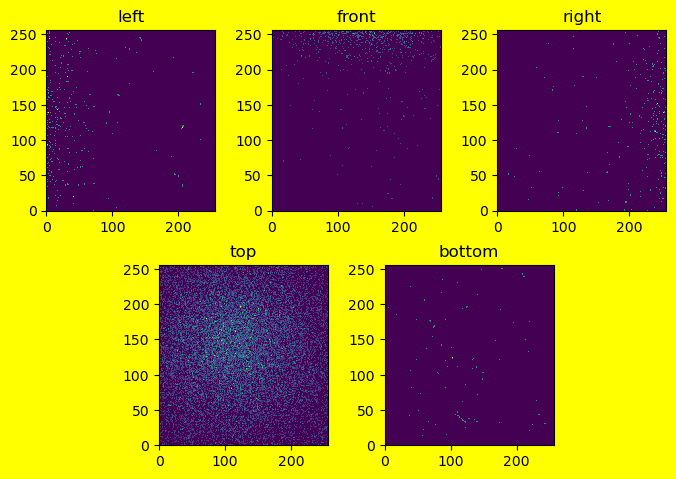

In [6]:
SideHisto = {}

for side in SideArrayDict.keys():
    Temphisto = np.zeros_like(SideArrayDict[side][1],dtype = int)
    for i in SideArrayDict[side].values():
        Temphisto = Temphisto + i.astype(bool).astype(int)
    SideHisto[side] = Temphisto

sideplots = plt.figure(figsize=(8, 5.5), dpi=100,facecolor='yellow')
#sideplots.tight_layout()#subplots_adjust(hspace=5, wspace=5)
AX = gridspec.GridSpec(2,6)
AX.update(wspace = 1, hspace = 0.3)

#ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
#ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
#ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
#ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
#ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

ax1 = plt.subplot(AX[0,:2])
ax2 = plt.subplot(AX[0,2:4])
ax3 = plt.subplot(AX[0,4:6])
ax4 = plt.subplot(AX[1,1:3])
ax5 = plt.subplot(AX[1,3:5])

ax1.pcolormesh(SideHisto["left"])
ax2.pcolormesh(SideHisto["front"])
ax3.pcolormesh(SideHisto["right"])
ax4.pcolormesh(SideHisto["top"])
ax5.pcolormesh(SideHisto["bottom"])

ax1.title.set_text("left")
ax2.title.set_text("front")
ax3.title.set_text("right")
ax4.title.set_text("top")
ax5.title.set_text("bottom")

plt.savefig(CurrentWD+"\SidesHisto.jpg", dpi = 100)


#sideplots.colorbar(sideplots)
    

[  0.         0.         0.       ... 125.987394 134.176042 194.610585]


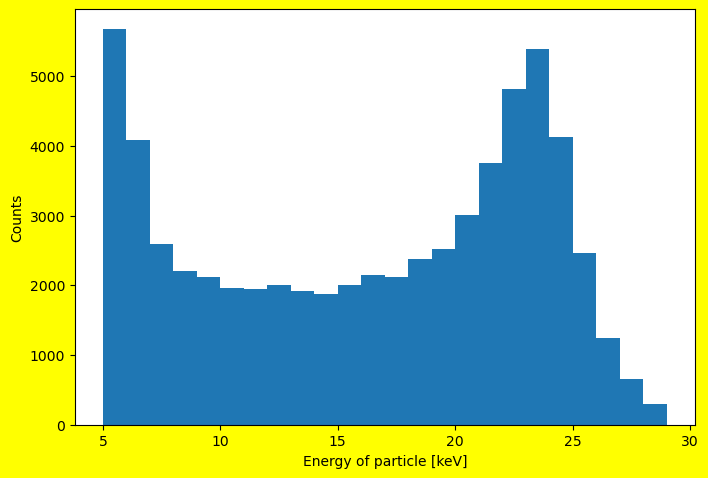

In [7]:
#print(CdArrays[0])
#plt.hist(x = CdArrays[0],bins = np.arange(1,math.ceil(np.amax(CdArrays[0]))))
MainDataArray = np.concatenate([ArrayDict["Cd-109"][x] for x in ArrayDict["Cd-109"]],0)
MainDataArrayFlat = MainDataArray.flatten()
# merge all the data arrays and plot the histo
plt.figure(figsize=(8, 5.5), dpi=100,facecolor='yellow')
plt.hist(x = MainDataArrayFlat,bins = np.arange(5,30))
plt.xlabel("Energy of particle [keV]")
plt.ylabel('Counts')
plt.savefig(CurrentWD+"\Histo.jpg", dpi = 100)
print(np.sort(MainDataArrayFlat))

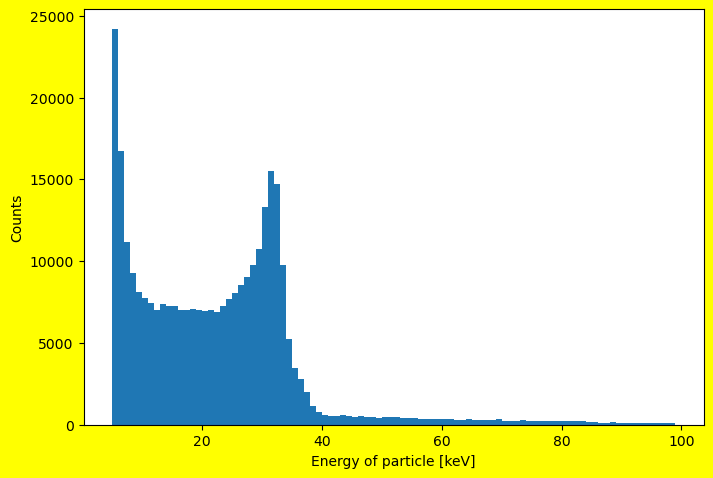

In [8]:
#print(CdArrays[0])
#plt.hist(x = CdArrays[0],bins = np.arange(1,math.ceil(np.amax(CdArrays[0]))))
MainDataArray = np.concatenate([ArrayDict["Ba-133"][x] for x in ArrayDict["Ba-133"]],0)
MainDataArrayFlat = MainDataArray.flatten()
# merge all the data arrays and plot the histo
plt.figure(figsize=(8, 5.5), dpi=100,facecolor='yellow')
plt.hist(x = MainDataArrayFlat,bins = np.arange(5,100))
plt.xlabel("Energy of particle [keV]")
plt.ylabel('Counts')
plt.savefig(CurrentWD+"\HistoBa.jpg", dpi = 100)